## Artificial Intelligence Assignment 1
presented by - Ashutosh Chauhan  
### Problem 2
The Simple Problem Solving Agent will recieve the initial state as the input and final/goal state is hardcoded. We can input any initial state.

In [3]:
from copy import deepcopy
from graphviz import Digraph

#### Node Object
This object will be placed in frontier and will contain all the relevent details such as state, parent, action and path cost

In [4]:
class Node:
    def __init__(self, state, parent, action, path_cost):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost

#### Problem Object
The Problem Object will contain the initial state, all available actions, transition function, and goal test function.

In [5]:
class Problem:
    def __init__(self, 
                 initial_state, 
                 actions, 
                 transition, 
                 goal_test):
        self.initial_state = initial_state
        self.actions = actions
        self.transition = transition
        self.goal_test = goal_test

#### Heuristic Function
We used no of correctly placed pieces as the Heuristic function

In [6]:
def heuristic(state1, state2):
    count = 9
    for i,j in [(i,j) for i in range(3) for j in range(3)]:
        if state1[i][j] == state2[i][j]:
            count-=1
    return count

In [7]:
# def heuristic(state1, state2):
#     count = 100
#     x = [(i,j) for i in range(3) for j in range(3)]
#     for i,j in x:
#         for k,l in x:
#             if state1[i][j] == state2[k][l]:
#                 count -= abs(i-k) + abs(j-l)
#     return count

#### Problem Solving Agent
The recieves the initial state on creation and creates an empty list of sequence and goal

In [20]:
class SimpleProblemSolvingAgent:
    # Contructor
    def __init__(self, initial_state):
        self.seq = []
        self.state = initial_state
        self.goal = None
        # self.problem = None

    # Runs the Simple Problem Solving Agent
    def run(self):
        # Make sure no existing sequence is 
        if not self.seq:
            # Formulate the goal based on the initial state
            self.goal = self.formulate_goal()

            # Formulate the problem based of the goal
            problem = self.formulate_problem()

            # Search for the sequence of actions to achieve the goal
            self.seq = self.search(problem)

            # If No response then do nothing
            if not self.seq:
                return None
        # action = self.seq.pop(0)
        return self.seq
    
    # Formulate the problem based of the goal
    def formulate_problem(self):
        goal = self.goal

        # Goal Test Function: matches state with final state
        goal_test = lambda state: state == self.goal

        # Set of possible actions: Up, Down, Left, Right
        actions = {'U','D','L','R'}

        # return a new instance of problem
        p = Problem(self.state, actions, self.transition, goal_test)
        return p
    
    # Hardcode the goal state
    def formulate_goal(self):
        return [[0,1,2],[3,4,5],[6,7,8]]
    
    # Search the Sequence of actions for the given problem
    # It can use multiple algorithms to search
    def search(self, problem, algo=None):
        # If algo not already provided
        if not algo:
            algo = input("Enter Search Algorithm:")

        # Breadth First Search
        if algo == 'BFS':
            return self.search_bfs(problem)
        # Depth First Search
        elif algo == 'DFS':
            return self.search_dfs(problem)
        # Iterative Deepening Deapth First Search
        elif algo == 'IDDFS':
            return self.search_iddfs(problem)
        # Greedy Best First Search
        elif algo == 'GBFS':
            return self.search_gbfs(problem)
        # A Star Search
        elif algo == 'ASTAR':
            return self.search_a_star(problem)
        # Search Algorithm not found!
        else:
            return []


    # Breadth First Search
    def search_bfs(self, problem):
        frontier = [Node(problem.initial_state, None, '', 0)]
        # Set of Visited States
        visited = set()

        # While there are nodes to be explored
        while frontier:
            # Pop the first element
            current = frontier.pop(0)

            # If element is already visited then skip
            if tuple(map(tuple,current.state)) in visited:
                continue
            
            # Add current node to visited nodes
            visited.add(tuple(map(tuple, current.state)))
            
            # Check if goal state condition is reached
            if problem.goal_test(current.state):
                print('cost', current.path_cost)
                print('Sequence of actions:', list(current.action))
                return list(current.action)

            # Add all the child/neigbour to frontier
            for action in problem.actions:
                new_state = problem.transition(current.state, action)
                
                # Do not add visited node again

                if tuple(map(tuple, new_state)) not in visited:
                    node = Node(new_state, current.state, current.action + action, current.path_cost + 1)
                    frontier.append(node)
        return []
    
    # Iterative Deepening Depth First Search
    def search_iddfs(self, problem, max_depth = 100):
        for i in range(1, max_depth + 1):
            # Try for each depth until solution is found or limit is reached
            path = self.search_dfs(problem, i)
            if path:
                return path
        return []

    # Depth First Search
    def search_dfs(self, problem, max_depth = 100):
        frontier = [Node(problem.initial_state, None, '', 0)]
        # Set of Visited States
        visited = set()

        # While there are nodes to be explored
        while frontier:
            # Pop the first element
            current = frontier.pop(-1)

            # If max_depth is reached
            if len(current.action) > max_depth:
                continue

            # If element is already visited then skip
            if tuple(map(tuple,current.state)) in visited:
                continue
            
            # Add current node to visited nodes
            visited.add(tuple(map(tuple, current.state)))
            
            # Check if goal state condition is reached
            if problem.goal_test(current.state):
                print('cost', current.path_cost)
                print('Sequence of actions:', list(current.action))
                return list(current.action)

            # Add all the child/neigbour to frontier
            for action in problem.actions:
                new_state = problem.transition(current.state, action)
                
                # Do not add visited node again

                if tuple(map(tuple, new_state)) not in visited:
                    node = Node(new_state, current.state, current.action + action, current.path_cost + 1)
                    frontier.append(node)
        return []

    # Greedy Best First Search
    def search_gbfs(self, problem):
        frontier = [Node(problem.initial_state, None, '', 0)]
        # Set of Visited States
        visited = set()

        # While there are nodes to be explored
        while frontier:
            # Sort the list based of the heuristic
            frontier.sort(key=lambda node: heuristic(node.state, self.goal))
            # Pop the first element
            current = frontier.pop(0)

            # If element is already visited then skip
            if tuple(map(tuple,current.state)) in visited:
                continue
            
            # Add current node to visited nodes
            visited.add(tuple(map(tuple, current.state)))
            
            # Check if goal state condition is reached
            if problem.goal_test(current.state):
                print('cost', current.path_cost)
                print('Sequence of actions:', list(current.action))
                return list(current.action)

            # Add all the child/neigbour to frontier
            for action in problem.actions:
                new_state = problem.transition(current.state, action)
                
                # Do not add visited node again

                if tuple(map(tuple, new_state)) not in visited:
                    node = Node(new_state, current.state, current.action + action, current.path_cost + 1)
                    frontier.append(node)
        return []
    
    # A Star Search
    def search_a_star(self, problem):
        frontier = [Node(problem.initial_state, None, '', 0)]
        # Set of Visited States        
        visited = set()

        # While there are nodes to be explored
        while frontier:
            # Search based of heuristic + path_cost
            frontier.sort(key=lambda node: heuristic(node.state, self.goal) + node.path_cost)
            # Pop the first element
            current = frontier.pop(0)

            # If element is already visited then skip
            if tuple(map(tuple,current.state)) in visited:
                continue
            
            # Add current node to visited nodes
            visited.add(tuple(map(tuple, current.state)))
            
            # Check if goal state condition is reached
            if problem.goal_test(current.state):
                print('cost', current.path_cost)
                print('Sequence of actions:', list(current.action))
                return list(current.action)

            # Add all the child/neigbour to frontier
            for action in problem.actions:
                new_state = problem.transition(current.state, action)
                
                # Do not add visited node again

                if tuple(map(tuple, new_state)) not in visited:
                    node = Node(new_state, current.state, current.action + action, current.path_cost + 1)
                    frontier.append(node)
        return []

    # A utility function to find location of the empty block
    def get_empty_block_position(self, state):
        for i,j in [(i,j) for i in range(3) for j in range(3)]:
            if state[i][j] == 0:
                return (i,j)


    # A transition function utility that returns the result of 
    # applying a transformation action on a stte
    def transition(self, old_state, action):

        # create a copy of old state
        state = deepcopy(old_state)

        # get position of empty block
        i,j = self.get_empty_block_position(old_state)

        # Action: Up
        if action == 'U':
            if i != 0:
                x = state[i][j]
                state[i][j] = state[i-1][j]
                state[i-1][j] = x

        # Action: Dowm        
        elif action == 'D':
            if i != 2:
                x = state[i][j]
                state[i][j] = state[i+1][j]
                state[i+1][j] = x
            
        # Action: Left        
        elif action == 'L':
            if j != 0:
                x = state[i][j]
                state[i][j] = state[i][j-1]
                state[i][j-1] = x
        
        # Action: Right
        elif action == 'R':
            if j != 2:
                x = state[i][j]
                state[i][j] = state[i][j+1]
                state[i][j+1] = x
        
        return state
    
    # Create a graph representing the transformations applied on the puzzle
    def make_graph(self, initial_state, path):
        # Initialize the graph
        dot = Digraph('Puzzle', node_attr={'shape': 'record'}, graph_attr={'size': '5,5!'})
        states=[initial_state]
        if not path:
            return
        
        # Add states after each transformations
        for action in path:
            old=states[-1]
            states.append(self.transition(old, action))
        
        for cc,((a,b,c),(d,e,f),(g,h,i)) in enumerate(states):
            # Add New Node(Puzzle State Representation)
            l=f'{{{a}|{d}|{g}}}|{{{b}|{e}|{h}}}|{{{c}|{f}|{i}}}'
            dot.node(str(cc), label=l)
            cc+=1

        # Add edges in the graph with the action name
        for i in range(len(states)-1):
            dot.edge(str(i),str(i+1),label=path[i])

        # Return the graph
        return dot

    # Utility function to print state(debug purpose only)
    def print(self,state):
        for i,j,k in state:
            print(i,j,k)


Enter Search Algorithm: BFS


cost 4
Sequence of actions: ['R', 'U', 'U', 'L']


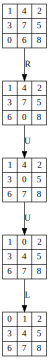

In [25]:
initial_state = [[1,4,2],[3,7,5],[0,6,8]]
# initial_state = [list(map(int, input().split())) for i in range(3)]
spsa = SimpleProblemSolvingAgent(initial_state)
path = spsa.run()
spsa.make_graph(initial_state, path)